# ML Feature enginerring - SelectKbest

In [1]:
%matplotlib inline
%run ../talibref.py
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Get data

In [50]:
#df=pd.read_csv("data/IYZ.csv")
# ticker = 'ITB'
# ticker = 'IYE'
# ticker = 'IYH'
# ticker = 'IYM'
# ticker = 'IYR'
# ticker = 'IYW'
ticker = 'IYZ'
startdate=datetime.date(2009, 12, 31)
enddate = datetime.date(2015, 11, 30)
# enddate=datetime.date.today()
df = generate_ticker_data(ticker, startdate, enddate)

Available data: Ticker(IYZ) from 2000-05-26 to 2015-12-04
Usable data: Ticker(IYZ) from 2001-03-14 to 2015-12-04 
Returned data: Ticker(IYZ) from 2009-12-31 to 2015-11-30 
Save path: data/IYZ_from_2009-12-31_2015-11-30.csv


In [51]:
dftouse=df.copy()

### Feature Engineering

In [52]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [53]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        #print v, l
        INDICATORS.append(v)

In [54]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        #print v
        STANDARDIZABLE.append(v)

In [55]:
dftouse['date'] = pd.to_datetime(dftouse['date'])
mask = (dftouse.date < '2014-12-31').values
mask.shape, mask.sum()

((1489L,), 1258)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [56]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2009-12-31,-1.201091,-1.239613,-1.220543,-1.265236,-0.008270,20.549999,True,0.026473,19.070000,False,-0.047453,1,-1.332303,-1.296524,-1.245343,0.175007,-0.145913,False,False,False,0,-1.473924,-1.612689,-1.595117,1,1,-1.615477,-1.695014,-1.685499,1,1,-1.266174,1,1.197050,0.755412,-0.763246,True,True,1,1.052312,1,0.093474,1,1.332842,1.558379,-0.279000,0,1.163484,1,1.588815,0,0.192107,0,0.607188,0,-0.417478,0,-0.156655,0,1.449704,1,-0.617705,0.285947,0,-1.224255,-1.201682,1,1.381892,1,-1.242212,-1.020557,-1.048089,-1.183834,-1.236724,-0.947053,-1.026232,0
1,2010-01-04,-1.167365,-1.155386,-1.150281,-1.116371,0.638583,20.680000,True,0.006326,18.719999,False,-0.089051,0,-1.319284,-1.277113,-1.219671,1.341483,-0.221063,False,True,False,0,-1.458621,-1.604374,-1.588638,1,1,-1.588448,-1.684346,-1.673483,1,1,-1.255717,1,1.217582,1.263539,-1.067442,True,True,1,1.312200,1,1.004830,1,1.387926,1.547044,-0.095395,0,1.162342,1,1.559683,0,1.443705,0,1.355867,0,0.191576,0,1.334706,0,1.561447,1,-0.269989,-0.148099,0,0.698039,-0.732061,0,1.448956,1,-1.141057,-0.825720,-0.888661,-1.049357,-1.173908,-0.727353,-0.907802,0
2,2010-01-05,-1.099915,-1.096427,-1.096882,-1.079857,2.142626,20.340000,False,-0.016441,18.900000,False,-0.086074,0,-1.294746,-1.258835,-1.207953,1.442826,-0.154935,False,True,False,0,-1.442453,-1.595657,-1.581828,1,1,-1.561351,-1.673068,-1.659668,1,1,-1.239756,1,1.293296,1.655441,-1.215555,True,True,1,1.377173,1,1.253848,1,1.455334,1.552644,0.079128,1,1.169243,1,1.643106,0,1.298933,0,1.504104,0,0.626435,0,1.120944,0,1.927408,1,0.257136,-0.227095,0,1.139066,0.256838,0,1.516808,1,-1.091416,-0.735518,-0.849930,-0.948727,-1.177549,-0.592085,-0.919817,0
3,2010-01-06,-1.069001,-1.104850,-1.150281,-1.175355,1.022106,20.260000,False,-0.003933,18.600000,False,-0.085546,0,-1.285061,-1.251184,-1.202451,0.550681,-0.133898,False,False,False,0,-1.430752,-1.588396,-1.576121,1,1,-1.542412,-1.663919,-1.651114,1,1,-1.215639,1,1.250911,1.079034,-0.844469,True,True,1,1.312200,1,0.658959,1,1.377076,1.540095,-0.107903,0,1.158204,1,1.401836,0,0.315018,0,0.702506,0,0.062282,0,0.212456,0,1.385121,1,0.803908,0.284862,0,-0.973098,0.361931,1,1.578204,1,-1.143867,-0.877135,-0.950811,-1.041123,-1.187564,-0.766123,-0.977316,0
4,2010-01-07,-1.175797,-1.203115,-1.181196,-1.197825,0.113288,20.110001,False,-0.007404,18.570000,False,-0.083416,0,-1.282289,-1.242399,-1.187670,0.302403,-0.202270,False,False,False,0,-1.420411,-1.581548,-1.570713,1,1,-1.522822,-1.655929,-1.642515,1,1,-1.193934,1,1.151281,0.829702,-0.625327,True,True,1,1.247228,1,0.087865,1,1.271081,1.506992,-0.319724,0,1.070066,1,1.153828,0,-0.190239,0,0.531060,0,-0.094912,0,-0.001305,0,0.969668,1,-0.050423,0.363933,0,-1.224255,-0.442426,1,1.631641,1,-1.194444,-0.974554,-1.048089,-1.090523,-1.236724,-0.859173,-1.070000,1


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [57]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE: 
        lcols.append(c)
print len(lcols)

70


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [58]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)

44 26


In [59]:
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    fitmodel.fit(X, y)
    return fitmodel.best_estimator_

In [60]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask is not None:
        #print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split is not None:
        #print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
#     training_accuracy = clf.score(Xtrain, ytrain)
#     test_accuracy = clf.score(Xtest, ytest)
    return clf

In [61]:
X=dftouse[lcols].values
y=dftouse['results'].values
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]  
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [62]:
print "whole data set", dftouse['results'].mean()
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set 0.465413028878
training set 0.468203497615 test set 0.450216450216


#####our data is not very asymmetric, but we might still want to balance the trainset

### Balancing train set to test set for training, 
### intended to be used with SVM only

In [63]:
# jtrain=np.arange(0, ytrain.shape[0])
# n_pos=len(jtrain[ytrain==1])
# n_neg=len(jtrain[ytrain==0])
# print n_pos, n_neg

# ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)
# alli=np.concatenate((jtrain[ytrain==1], ineg))
# Xtrain_new = Xtrain[alli]
# ytrain_new = ytrain[alli]
# print Xtrain_new.shape, ytrain_new.shape

# reuse_split_balanced=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

## Test all classifiersres using SelectKbest

In [64]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression

def evaluate_performance(clf, signal_col='pred', strategy=[1], commission=False, price_column='close'):
    df_pred = df[~mask].reset_index(drop=True)
    df_pred['baseline'] = np.ones(df_pred.shape[0])
    df_pred['pred'] = clf.predict(Xtest)
    
    #datetime.date(2015, 7, 1)
    _,_,ROI,balance_over_time,signals = evaluate_profit(df_pred, firstday(df_pred), lastday(df_pred), 10000, signal_col, 
                                                        price_column, commission, strategy)
    return ROI, balance_over_time, signals

def evaluate_features(clfpipe):     
    return clfpipe.get_params()['selectk__k'], np.array(lcols)[clfpipe.named_steps['selectk'].get_support()].tolist()

def plot_signal(title, signals):
    fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
    ax0.plot(df.date[~mask], df.close[~mask], lw=1)
    
    short_days=zip(*signals[0])[0]
    short_prices=zip(*signals[0])[1]
    long_days=zip(*signals[1])[0]
    long_prices=zip(*signals[1])[1]
    ax0.scatter(long_days, long_prices, color='g', label="Long Signals") 
    ax0.scatter(short_days, short_prices, color='r', label="Short Signals")
    ax0.legend(frameon=False, loc='upper right')
    ax0.set_title(title)

def print_result(clf, name):
    print "train accuracy: {0}".format(clf.score(Xtrain, ytrain))
    print "test accuracy: {0}".format(clf.score(Xtest, ytest))
    print evaluate_features(clf)
    ROI0, BOT0, signals0 = evaluate_performance(clf, strategy=[1], signal_col="baseline")
    print "ROI baseline:{0}".format(ROI0)
    ROI1, BOT1, signals1 = evaluate_performance(clf, strategy=[1])
    print "ROI long-only: {0}".format(ROI1)
    ROI2, BOT2, signals2 = evaluate_performance(clf, strategy=[0])
    print "ROI short-only: {0}".format(ROI2)
    ROI3, BOT3, signals3 = evaluate_performance(clf, strategy=[1,0])
    print "ROI long-short: {0}".format(ROI3)
    
    Long_ROI_result[name] = ROI1
    Short_ROI_result[name] = ROI2
    LS_ROI_result[name] = ROI3

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score

### by default, use results column 

In [66]:
Signal_Column = u'results'
# Signal_Column = u'result_14'
Long_ROI_result={}
Short_ROI_result={}
LS_ROI_result={}
selectk = SelectKBest(score_func=f_regression)

In [19]:
print "#############====================== Log Regression =====================#############"
selectk = SelectKBest(score_func=f_regression)
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR = do_classify(pipeLR, {"selectk__k":range(1, 11), 
                              "LR__C": [1e-3, 1e-2, 1e-1, 1, 1e2]}, 
                     dftouse, lcols, Signal_Column, 1,  mask=mask)

print pipeLR.get_params()['LR__C']
print_result(pipeLR, "Log Regression")

#############====================== Log Regression =====================#############
0.1
train accuracy: 0.694753577107
test accuracy: 0.710638297872
(4, ['bb_pct', 'cci', 'rsi', 'stoch_slowk'])
ROI baseline:0.0075019659
ROI long-only: 0.1716905927
ROI short-only: 0.1576306364
ROI long-short: 0.3565771502


In [20]:
# %%time
# print "#############====================== Linear SVM ========================#############"
# clfsvm_b = Pipeline([('selectk', selectk), ('svm', LinearSVC(loss="hinge"))])
# clfsvm_b = do_classify(clfsvm_b, {"selectk__k":range(1,11), 
#                                   "svm__C": [1e-300, 1e-200, 1e-100, 1e-10, 1e-1, 1]}, 
#                        #dftouse,lcols, Signal_Column, 1, reuse_split=reuse_split_balanced)
#                        dftouse,lcols, Signal_Column, 1, mask=mask)

# print clfsvm_b.get_params()['svm__C']
# print_result(clfsvm_b, "Linear_SVM")

In [21]:
%%time
print "#############====================== RBF SVM ===========================#############"
pipesvm2 = Pipeline([('selectk', selectk), ('svm2', SVC())])
pipesvm2 = do_classify(pipesvm2, {"selectk__k":range(1,11), 
                                  "svm2__C": [1e-100, 1e-10, 1e-1, 1, 1e10], 
                                  "svm2__gamma": [ 1e-9, 1e-10, 1e-11]}, 
                       dftouse, lcols, Signal_Column, 1, mask=mask)

print pipesvm2.get_params()['svm2__C'], pipesvm2.get_params()['svm2__gamma']
print_result(pipesvm2, "RBF_SVM")

#############====================== RBF SVM ===========================#############
10000000000.0 1e-11
train accuracy: 0.68839427663
test accuracy: 0.672340425532
(5, ['bb_pct', 'plus_di', 'cci', 'rsi', 'stoch_slowk'])
ROI baseline:0.0075019659
ROI long-only: 0.0924226444
ROI short-only: 0.0806676841
ROI long-short: 0.1804622936
Wall time: 43.7 s


In [22]:
%%time
print "#############====================== Random Forest =====================#############"
pipeRF = Pipeline([('selectk', selectk), ('RF', RandomForestClassifier())])
pipeRF = do_classify(pipeRF, {"selectk__k": [5,6,7,8,9,10], "RF__max_depth": [3,5,7,10], 
                              "RF__n_estimators": [5,10,20,40], "RF__max_features": [1,2,3,4,5]}, 
                     dftouse, lcols, Signal_Column, 1, mask=mask)

print pipeRF.get_params()['RF__max_depth'], pipeRF.get_params()['RF__n_estimators'], pipeRF.get_params()['RF__max_features']
print_result(pipeRF, "Random_forest")

#############====================== Random Forest =====================#############
5 20 2
train accuracy: 0.767885532591
test accuracy: 0.685106382979
(10, ['bb_pct', 'plus_di', 'minus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastd'])
ROI baseline:0.0075019659
ROI long-only: 0.1833098375
ROI short-only: 0.1681008819
ROI long-short: 0.3825747348
Wall time: 2min 13s


In [23]:
%%time
print "#############====================== Extra Trees= =====================#############"
pipeET = Pipeline([('selectk', selectk), ('ET', ExtraTreesClassifier())])
pipeET = do_classify(pipeET, {"selectk__k": [5,6,7,8,9,10], "ET__max_depth": [3,5,7,10,15,25,50], 
                              "ET__n_estimators": [5,10,20,40], "ET__max_features": [1,2,3,4,5]}, 
                     dftouse, lcols, Signal_Column, 1, mask=mask)

print "ET__max_depth: {0}".format(pipeET.get_params()['ET__max_depth']) 
print "ET__n_estimators: {0}".format(pipeET.get_params()['ET__n_estimators']) 
print "ET__max_features: {0}".format(pipeET.get_params()['ET__max_features']) 
print_result(pipeET, "Extra_Trees")

#############====================== Extra Trees= =====================#############
ET__max_depth: 3
ET__n_estimators: 5
ET__max_features: 2
train accuracy: 0.671701112878
test accuracy: 0.710638297872
(10, ['bb_pct', 'plus_di', 'minus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastd'])
ROI baseline:0.0075019659
ROI long-only: 0.1227015634
ROI short-only: 0.1050436035
ROI long-short: 0.2407901042
Wall time: 2min 35s


In [24]:
%%time
print "#############====================== Gaussian NB ==========================#############"
pipeNB = Pipeline([('selectk', selectk), ('NB', GaussianNB())])
pipeNB = do_classify(pipeNB, {"selectk__k":range(1,10)},
                     dftouse, lcols, Signal_Column, 1, mask=mask)

print_result(pipeNB, "Gaussian_NB")

#############====================== Gaussian NB ==========================#############
train accuracy: 0.692368839428
test accuracy: 0.672340425532
(5, ['bb_pct', 'plus_di', 'cci', 'rsi', 'stoch_slowk'])
ROI baseline:0.0075019659
ROI long-only: 0.0924226444
ROI short-only: 0.0806676841
ROI long-short: 0.1804622936
Wall time: 792 ms


In [25]:
# %%time
# print "#############====================== Gradient Boosting ====================#############"
# pipeGB = Pipeline([('selectk', selectk), ('GB', GradientBoostingClassifier())])
# pipeGB = do_classify(pipeGB, {"selectk__k":range(1,10), 
#                               "GB__n_estimators": [5,10,20,40],
#                               "GB__learning_rate": [0.1,0.5,1.0]}, 
#                      dftouse, lcols, Signal_Column, 1, mask=mask)

# print pipeGB.get_params()['GB__n_estimators'], pipeGB.get_params()['GB__learning_rate']
# print_result(pipeGB, "Gradient_Boosting")

In [26]:
print "Ticker: " + ticker
print "ROI baseline: {0}".format(evaluate_performance(pipeNB, strategy=[1], signal_col="baseline")[0])
print "AVG ROI: {0}".format(np.average(Long_ROI_result.values()))
Long_ROI_result

Ticker: IYZ
ROI baseline: 0.0075019659
AVG ROI: 0.13250945648


{'Extra_Trees': 0.12270156340000103,
 'Gaussian_NB': 0.09242264439999999,
 'Log Regression': 0.17169059269999962,
 'RBF_SVM': 0.09242264439999999,
 'Random_forest': 0.18330983749999996}

## Show trading signal 

C:\Apps\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


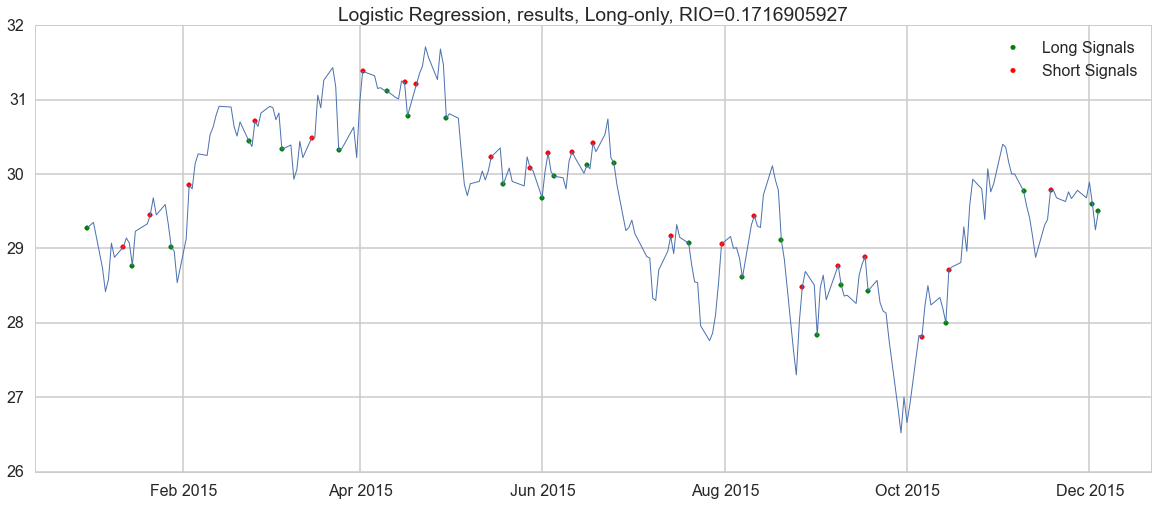

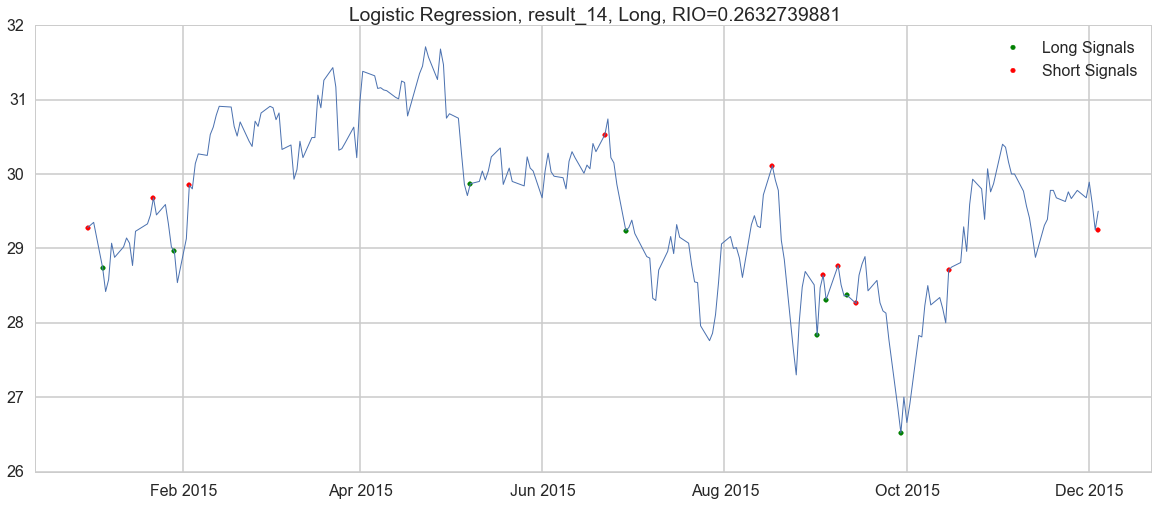

In [27]:
## view trading signals of results
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR = do_classify(pipeLR, {"selectk__k":range(1, 11), 
                              "LR__C": [1e-3, 1e-2, 1e-1, 1, 1e2]}, 
                     dftouse, lcols, u'results', 1, mask=mask)
ROI, BOT, signals = evaluate_performance(pipeLR)
plot_signal('Logistic Regression, results, Long-only, RIO={0}'.format(ROI), signals)

## view trading signals of result_14
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR = do_classify(pipeLR, {"selectk__k":range(1, 11), 
                              "LR__C": [1e-3, 1e-2, 1e-1, 1, 1e2]}, 
                     dftouse, lcols, u'result_14', 1, mask=mask)
ROI, BOT, signals = evaluate_performance(pipeLR)
plot_signal('Logistic Regression, result_14, Long, RIO={0}'.format(ROI), signals)

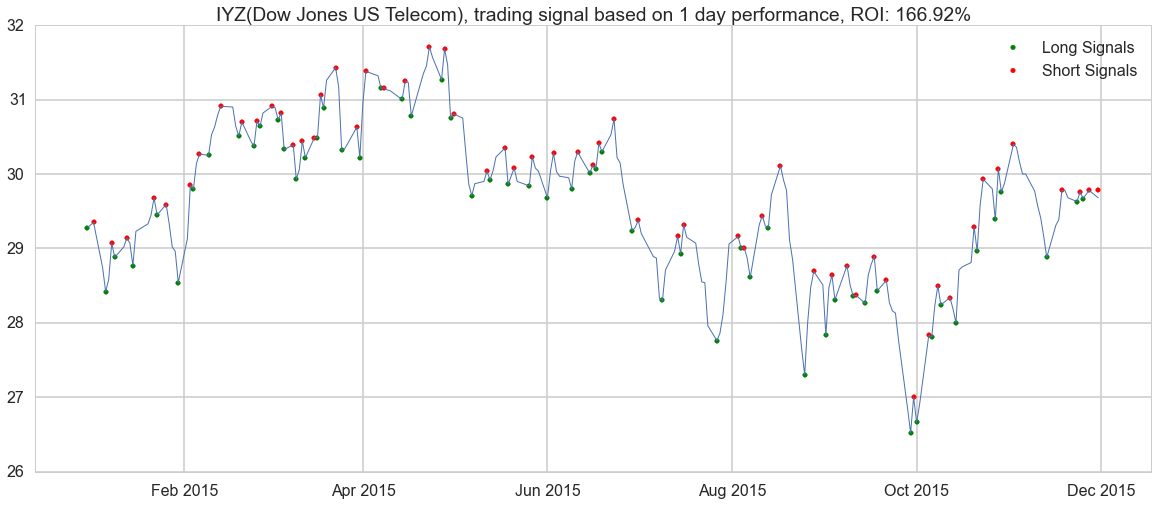

In [72]:
ROI, BOT, signals = evaluate_performance(pipeLR, signal_col= 'result_1', strategy=[1,0])
plot_signal('IYZ(Dow Jones US Telecom), trading signal based on 1 day performance, ROI: {0:.2f}%'.format(ROI*100), signals)

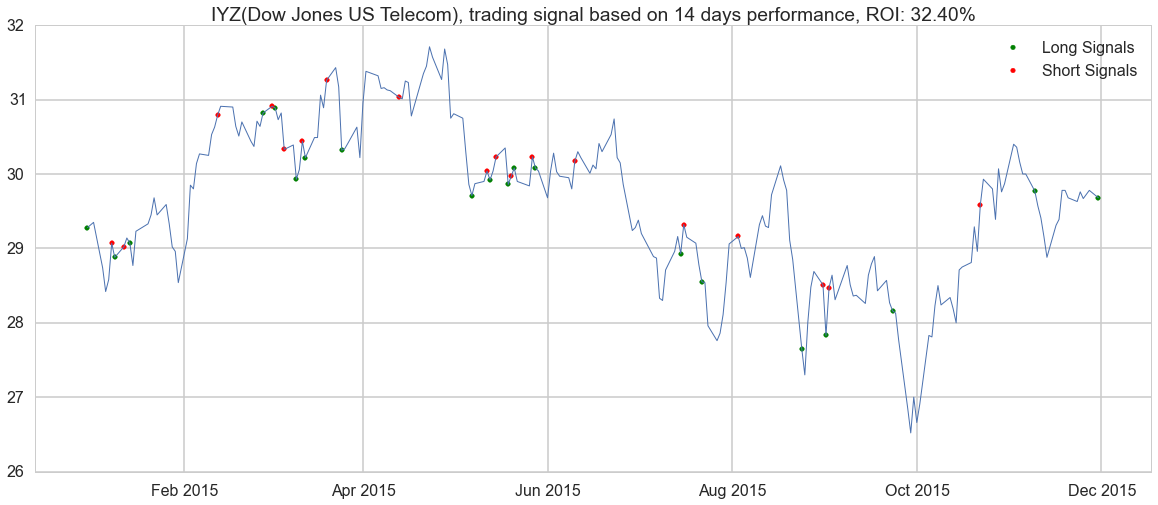

In [68]:
ROI, BOT, signals = evaluate_performance(pipeLR, signal_col= 'result_14')
plot_signal('IYZ(Dow Jones US Telecom), trading signal based on 14 days performance, ROI: {0:.2f}%'.format(ROI*100), signals)

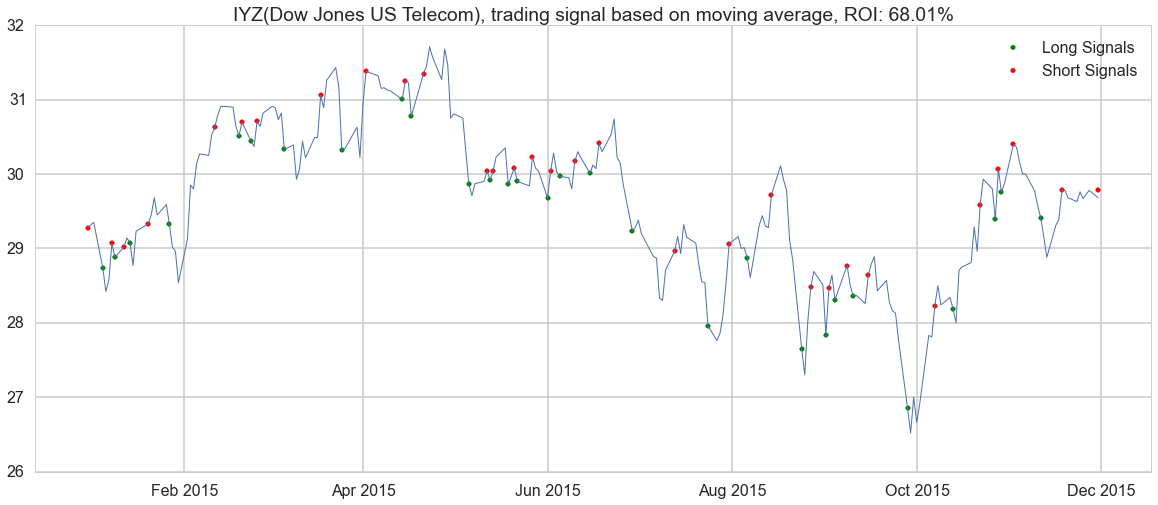

In [74]:
ROI, BOT, signals = evaluate_performance(pipeLR, signal_col= 'results', strategy=[1])
plot_signal('IYZ(Dow Jones US Telecom), trading signal based on moving average, ROI: {0:.2f}%'.format(ROI*100), signals)